In [2]:
import matplotlib.pyplot as plt
import librosa as lb
import numpy as np
import scipy.signal as ss
import soundfile as sf

In [35]:
def calcul_soliste(signal_full,signal_background,decal_signal,fech=44100,temps_ou_nb=True,path_file=None):
    #### Fonction qui calcule le décalage entre 2 audio en utilisant la corrélation
    # signal_full prends en entrée le signal audio full.
    # signal_background prends en entrée le signal audio background.
    # fech est la fréquence d'échantillonage des signaux audio.
    # decal_signal est le décalge à réaliser (en nombre d'élément ou en temps) pour mettre les audio en phase
    # temps_ou_nb est pour indiquer si le décalage est en nombre d'élément ou en temps True si le décalage est en temps, False sinon.
    # Path_file indique ou et sous quelle nom enregistrer les fichiers. Nous enregistrons les fichiers dans le même format que celui initiale.
    # Si path_file=None alors nous enregistrons dans le répertoire courant.
    # La fonction ne renvoie rien mais écris sur le disque le signal du soliste seul déduit a partir du décalage indiquer. Le fichier se nomme soliste.mp3

    if temps_ou_nb == True:
        nb_decal_elem=np.int32(np.round(decal_signal*fech))
    else:
        nb_decal_elem=decal_signal
    signal_back_decal=np.zeros(np.shape(signal_full))

    if(np.shape(signal_full)[0]+nb_decal_elem>np.shape(signal_background)[0]):
        if nb_decal_elem<0 :
            signal_back_decal[-nb_decal_elem:np.shape(signal_background)[0]-nb_decal_elem]=signal_background[:]
            print("cas 1")
        else:
            signal_back_decal[:np.shape(signal_background)[0]-nb_decal_elem]=signal_background[nb_decal_elem:]
            print("cas 2")
    else:
        if nb_decal_elem<0 :
            signal_back_decal[-nb_decal_elem:]=signal_background[:nb_decal_elem+np.shape(signal_full)[0]]
            print("cas 3")
        else:
            signal_back_decal[:]=signal_background[nb_decal_elem:nb_decal_elem+np.shape(signal_full)[0]]
            print("cas 4")
            
    signal_soliste=signal_full-signal_back_decal

    if path_file is not None:
        path_fin=path_file.split('/')
        path_fin=path_fin[len(path_fin)-1]
        path_dir='./bdd/'
        path_soliste=path_dir+'soliste_'+path_fin
        path_mix=path_dir+'mix_'+path_fin
        path_other=path_dir+'other_'+path_fin
        sf.write(path_soliste, signal_soliste, fech, )
        sf.write(path_mix, signal_full, fech, )
        sf.write(path_other, signal_back_decal, fech, )
    else:
        sf.write('soliste.mp3', signal_soliste, fech, )
        sf.write('mix.mp3', signal_full, fech, )
        sf.write('other.mp3', signal_back_decal, fech, )




def calcul_decalage(path_file_full,path_file_background,fech=44100,nb_valid=1,plot=False,calcul_signal=True):
    #### Fonction qui calcule le décalage entre 2 audio en utilisant la corrélation
    # path_file_full prends en entrée le chemin vers le fichier audio entier. Cela doit être une chaine de caractère.
    # path_file_background prends en entrée le chemin vers le fichier audio qui n'a que le background. Cela doit être une chaine de caractère.
    # fech est la fréquence d'échantillonage des signaux audio
    # plot est pour afficher l'autocorrelation
    # nb_valid n'est pas encore un argument utilisé mais il le sera peu etre dans une version ultérieur.
    # La fonction renvoie en 1er argument le décalage en temps et en deuxième argument le décalage en nombre de décalage a faire pour les aligner.
    y, sr = lb.load(path_file_full,sr=fech)
    y2, sr2 = lb.load(path_file_background,sr=fech)

    milieu_signal=np.int32(np.max(np.shape(y))/(2*sr))
    # print("milieu signal = ",milieu_signal)
    temps_deb_f=(milieu_signal-25)*sr
    temps_fin_f=(milieu_signal+25)*sr
    temps_deb_b=(milieu_signal-10)*sr
    temps_fin_b=(milieu_signal+10)*sr
    signal_tout=np.array(y)
    signal_backgroung=np.array(y2)
    signal_full_tronque=signal_tout[temps_deb_f:temps_fin_f]
    signal_backgroung_tronque=signal_backgroung[temps_deb_b:temps_fin_b]


    corr_mes=ss.correlate(signal_backgroung_tronque,signal_full_tronque,'valid')

    if plot==True :
        temps=(np.arange(np.max(np.shape(signal_full_tronque)))/sr-25)
        len_cor=np.max(np.shape(corr_mes))
        len_tp=np.max(np.shape(signal_full_tronque))
        plt.figure()
        plt.plot(temps[np.int32((len_tp-len_cor)/2):np.int32((len_tp+len_cor)/2)],corr_mes)
        plt.title("Mesure de la corrélation entre les 2 signaux audio")
        plt.xlabel("temps en seconde")
        plt.ylabel("score de correlation")
        plt.show()

    pos_max=np.argwhere(corr_mes==np.max(corr_mes))
    temps=(temps_deb_f+pos_max[0][0])/sr
    decalage=temps-temps_deb_b/sr
    print('le décalage est de',decalage,'s')
    if calcul_signal ==True :
        calcul_soliste(y,y2,decalage,sr,path_file=path_file_full)
    return(decalage,pos_max[0][0])

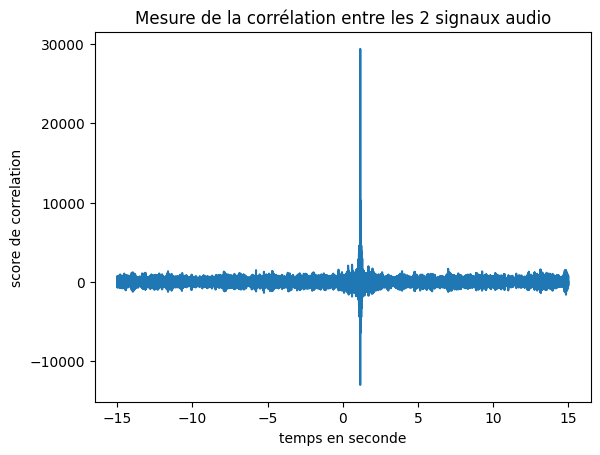

le décalage est de 1.1630839002267521 s
cas 2


In [44]:
path_1='./base_donnees/jacob_do_bandolim/JB4-10-santa-morena-ft.mp3'
path_2='./base_donnees/jacob_do_bandolim/JB4-10-santa-morena-pb.mp3'
dc , nb_decal = calcul_decalage(path_1,path_2,fech=44100,plot=True)


#### jacob : 
- 01 : 2.8571428 secondes
- 02 : 2.511405 secondes
- 03 : -0.0152834 secondes
- 04 : 3.5886167 secondes
- 05 : -0.43793650 secondes
- 06 : 3.2075283 secondes
- 07 : 1.6804988 secondes
- 08 : 3.93405895 secondes
- 09 : 2.0287301 secondes
- 10 : 1.1630839 secondes
#### jacob 2

#### jacob 3 

#### tico
- 1.62589569 secondes